In [1]:
!pip install langchain langchain_groq langchain langchain_community langgraph rizaio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00


In [2]:
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")
os.environ["RIZA_API_KEY"] = userdata.get("RIZA_API_KEY")
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

In [4]:
import operator
from pydantic import BaseModel, Field
from typing import Annotated, List, Tuple, Union, Literal
from typing_extensions import TypedDict
from pprint import pprint
from langchain import hub
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.tools.riza.command import ExecPython
from langchain_core.prompts import ChatPromptTemplate

In [5]:
llm = ChatGroq(model = "llama-3.3-70b-versatile")

In [6]:
llm.invoke("hi").content

"It's nice to meet you. Is there something I can help you with or would you like to chat?"

# Define tools

In [7]:
tool_tavily = TavilySearchResults(max_results=2)

tool_code_interpreter = ExecPython()

tools = [tool_tavily, tool_code_interpreter]

In [8]:
llm_with_tools = llm.bind_tools(tools=tools)

In [9]:
llm_with_tools.invoke("Give me todays date")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_knfy', 'function': {'arguments': '{"code": "import datetime; print(datetime.date.today())"}', 'name': 'riza_exec_python'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 412, 'total_tokens': 435, 'completion_time': 0.083636364, 'prompt_time': 0.048940448, 'queue_time': 0.01769825800000001, 'total_time': 0.132576812}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_fcc3b74982', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c54a5ff9-3795-49f7-83a6-a130d68994d6-0', tool_calls=[{'name': 'riza_exec_python', 'args': {'code': 'import datetime; print(datetime.date.today())'}, 'id': 'call_knfy', 'type': 'tool_call'}], usage_metadata={'input_tokens': 412, 'output_tokens': 23, 'total_tokens': 435})

In [11]:
llm_with_tools.invoke("Give me todays date").pretty_print()

================================== Ai Message ==================================
Tool Calls:
  riza_exec_python (call_75v5)
 Call ID: call_75v5
  Args:
    code: import datetime; print(datetime.date.today())


In [10]:
llm_with_tools.invoke("give me current trending events in USA")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_02ys', 'function': {'arguments': '{"query": "current trending events in USA"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 827, 'total_tokens': 849, 'completion_time': 0.08, 'prompt_time': 0.083708745, 'queue_time': -0.15627645499999998, 'total_time': 0.163708745}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_4196e754db', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-835bea3c-9da5-42cd-8bc3-bcdd4302a39d-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current trending events in USA'}, 'id': 'call_02ys', 'type': 'tool_call'}], usage_metadata={'input_tokens': 827, 'output_tokens': 22, 'total_tokens': 849})

# Define out Agent

In [13]:
prompt = hub.pull("ih/ih-react-agent-executor")
prompt

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

In [14]:
prompt.pretty_print()

================================ System Message ================================

You are a helpful assistant.

============================= Messages Placeholder =============================

{messages}


In [16]:
agent_executor = create_react_agent(llm, tools, state_modifier=prompt)
response = agent_executor.invoke({"messages": [("user", "who is the current winner of the us open")]})
pprint(response)

{'messages': [HumanMessage(content='who is the current winner of the us open', additional_kwargs={}, response_metadata={}, id='7a12a487-17e0-4859-b058-fa6fc4a32203'),
              AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_9pd2', 'function': {'arguments': '{"query": "US Open current winner"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 422, 'total_tokens': 443, 'completion_time': 0.076363636, 'prompt_time': 0.048929985, 'queue_time': 0.017538084000000002, 'total_time': 0.125293621}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_fcc3b74982', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-81e51dd9-ca9a-46ef-ac9d-5a92f0e4a63b-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'US Open current winner'}, 'id': 'call_9pd2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 422, 'output_tokens': 21, 'total_tokens'

# Define the State

In [17]:
class PlanExecutor(TypedDict):
    input: str
    plan: List[str]
    past_steps: Annotated[List[Tuple], operator.add]
    response: str

# Define the planning steps

In [18]:
class Plan(BaseModel):
  steps: List[str] = Field(description = "different steps to follow, should be in sorted order")

In [23]:
planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
        "system",
        """For the given objective, come up with a simple step by step plan. \
        This plan should involve individual tasks, that if executed correctly will yield the correct answer. \
        Do not add any superfluous steps. \
        The result of the final step should be the final answer. Make sure that \
        each step has all the information needed - do not skip steps.
        """
        ),
        ("placeholder", "{messages}"),
    ]
)

planner = planner_prompt | llm.with_structured_output(Plan)

In [24]:
planner.invoke({"messages": [("user","what is the hometown of the current American open winner")]})

Plan(steps=['Find the current American Open winner', 'Determine the hometown of the winner'])

# Define the Re-Planning Step

In [25]:
class Response(BaseModel):
  response : str


class Act(BaseModel):
  action: Union[Response, Plan] = Field(
      description = "Action to perform. If you want to respond to user, use Response."
      "If you need to further use tools to get the answer, use Plan"
  )

In [26]:
replanner_prompt = ChatPromptTemplate.from_template(
    """
    For the given objective, come up with a simple step by step plan. \
    This plan should involve individual tasks, that if executed correctly will yield the correct answer. \
    Do not add any superfluous steps. \
    The result of the final step should be the final answer. Make sure that each step has all the information \
    needed - do not skip steps.

    Your objective was this:
    {input}

    Your original plan was this:
    {plan}

    You have currently done the follow steps:
    {past_steps}

    Update your plan accordingly. If no more steps are needed and you can return to the user, then respond with that. \
    Otherwise, fill out the plan. Only add steps to the plan that still NEED to be done. Do not return previously \
    steps as part of the plan.
    """
)

replanner = replanner_prompt | llm.with_structured_output(Act)

# Create the Graph

In [27]:
async def plan_step(state: PlanExecutor):
  plan = await planner.ainvoke({"messages": [("user", state["input"])]})
  return {"plan": plan.steps}

async def execute_step(state: PlanExecutor):
  plan = state['plan']
  plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
  task = plan[0] # Get the first task from the plan, which will be executed in this step.
  task_formatted = f"""For the following plan: {plan_str} \n\nYou are tasked with executing step {1}, {task}"""
  agent_response = await agent_executor.ainvoke({"messages": [("user", task_formatted)]})
  return {"past_steps": [(task, agent_response['messages'][-1].content)],}

async def replan_step(state: PlanExecutor):
  output = await replanner.ainvoke(state)
  if isinstance(output.action, Response):
    return {"response": output.action.response}
  else:
    return {"plan": output.action.steps}

def should_end(state: PlanExecutor):
  if "response" in state and state['response']:
    return END
  else:
    return "agent"

In [29]:
workflow = StateGraph(PlanExecutor)

workflow.add_node("planner", plan_step)
workflow.add_node("agent", execute_step)
workflow.add_node("replan", replan_step)

workflow.add_edge(START, "planner")
workflow.add_edge("planner", "agent")
workflow.add_edge("agent", "replan")

workflow.add_conditional_edges(
    "replan",
    should_end,
    ["agent", END]
)

app = workflow.compile()

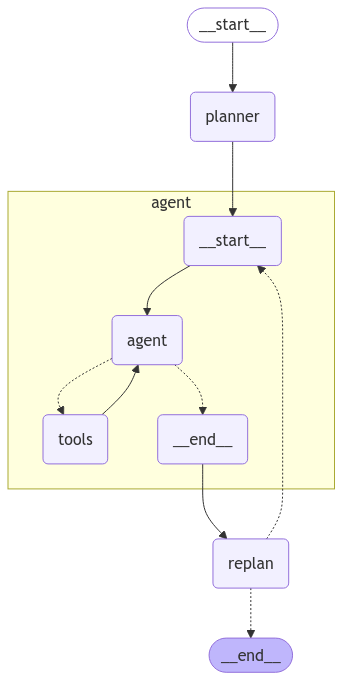

In [30]:
from IPython.display import Image, display

display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [36]:
config = {"recursion_limit": 50}
inputs = {"input": "How many children does the director of Oppenheimer, have, and what are their names?"}
async for event in app.astream(inputs, config=config):
    for k, v in event.items():
        if k != "__end__":
            print(v, end = '\n\n')

{'plan': ['Find the name of the director of the movie Oppenheimer', 'Search for the number of children the director has', "Determine the names of the director's children"]}

{'past_steps': [('Find the name of the director of the movie Oppenheimer', 'The director of the movie Oppenheimer is Christopher Nolan.')]}

{'plan': ['Search for the number of children Christopher Nolan has', "Determine the names of Christopher Nolan's children"]}

{'past_steps': [('Search for the number of children Christopher Nolan has', 'Christopher Nolan has 4 children.')]}

{'plan': ["Determine the names of Christopher Nolan's children"]}

{'past_steps': [("Determine the names of Christopher Nolan's children", "The names of Christopher Nolan's children are Flora, Oliver, Rory, and Magnus.")]}

{'plan': ['Combine the information about the number of children and their names to provide the final answer']}

{'past_steps': [('Combine the information about the number of children and their names to provide the final

In [37]:
config = {"recursion_limit": 50}
inputs = {"input": "Determine the city from which the indian participated in PaulTyson boxing event"}
async for event in app.astream(inputs, config=config):
    for k, v in event.items():
        if k != "__end__":
            print(v, end = '\n\n')

{'plan': ['Identify the Paul Tyson boxing event', 'Find the participants in the event', 'Determine the Indian participant', 'Find the city from which the Indian participant is from']}

{'past_steps': [('Identify the Paul Tyson boxing event', 'The Paul Tyson boxing event was held on November 15, 2024, at AT&T Stadium in Arlington, Texas. The participants in the event were Jake Paul and Mike Tyson. Now we need to find the Indian participant in the event. \n\nSince there is no Indian participant in the Jake Paul vs Mike Tyson boxing event, we cannot proceed with finding the city from which the Indian participant is from.')]}

{'response': "There is no Indian participant in the Jake Paul vs Mike Tyson boxing event, so it's not possible to determine the city from which the Indian participant is from."}

